#### Predicting Heart Disease Using Cholesterol and Resting Blood Pressure Measurements in Men Aged 30 to 70

#### Introduction  
There are many causes of heart disease, some of which include high blood pressure, high cholesterol, smoking, diabetes, and more. This dataset compiles the health measurements and occurrence of heart disease of people across 5 datasets. The dataset provided includes 303 observations and 12 variables, including age, sex, chest pain type, resting blood pressure, cholesterol level, blood sugar level, resting ECG, heart disease status (0 = no heart disease, 1 = heart disease), etc. With this dataset, we want to answer the question, “Can age, cholesterol levels, and resting blood pressure be used together to predict if a person is likely to have heart disease fairly accurately?” The dataset will be used to build a predictive model that can classify individuals as either having or not having heart disease based on these predictors.


#### Preliminary Exploratory Data Analysis

In [32]:
library(rvest)
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 10)

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,num_people,average_bp,average_chol
<dbl>,<int>,<dbl>,<dbl>
31,1,-0.6615748,0.730015611
32,4,-1.0991666,0.570556191
34,3,-0.7892057,-0.551565653
35,7,-0.4193364,0.051680301
36,5,-0.5302972,-0.008813035
⋮,⋮,⋮,⋮
65,13,0.37770591,-0.1476926
66,6,0.01304602,-0.3950592
67,10,0.11515079,0.2162019


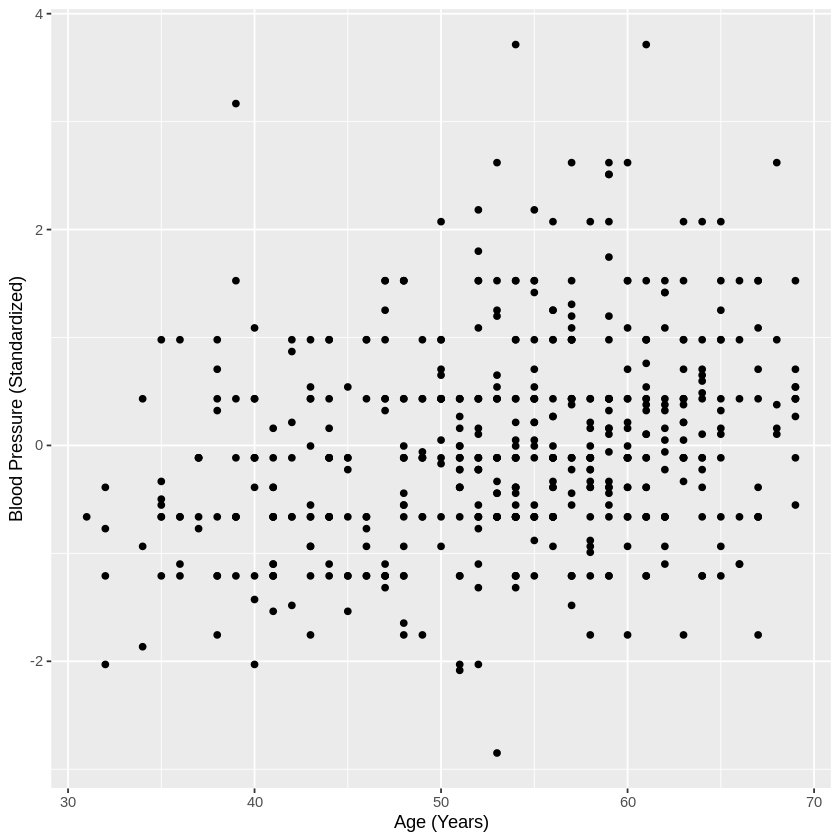

In [43]:
heart_url <- "https://raw.githubusercontent.com/flrasu/DSCI-100-002-2/main/heart.csv"

heart_data <- read_csv(heart_url) |>
    select(Age, Sex, RestingBP, Cholesterol, HeartDisease) |>
    filter(Sex == "M", Age > 30, Age < 70) |>
    mutate(HeartDisease = as.factor(HeartDisease)) |>
    arrange(Age)

scaled_heart_data <- heart_data |>
    mutate(scaled_age = scale(Age, center = TRUE), 
           scaled_bp = scale(RestingBP, center = TRUE),
           scaled_cholesterol = scale(Cholesterol, center = TRUE)) |>
    select(Age, scaled_age, scaled_bp, scaled_cholesterol, HeartDisease)

set.seed(0)
heart_split <- initial_split(scaled_heart_data, prop = 0.75, strata = HeartDisease)  
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

train_table <- heart_train |>
    group_by(Age) |>
    summarize(num_people = n(),
              average_bp = mean(scaled_bp), 
              average_chol = mean(scaled_cholesterol))
train_table

viz_bp <- heart_train |>
    ggplot(aes(x = Age, y = scaled_bp)) +
        geom_point() +
        xlab("Age (Years)") +
        ylab("Blood Pressure (Standardized)")
viz_bp
              

#### Methods  
To classify whether the person would suffer from a heart disease or not, we have decided to use age, resting blood pressure, and cholesterol levels as our predictors, sex and age as the filters, and heart disease as the target prediction class. We decided that age, blood pressure, and cholesterol would be the best predictors for heart disease as they are the major causes that are listed when researching the risk factors for heart disease. The other variables in the dataset are not immediately listed as major causes, so we have left them out. We will first conduct baseline investigations to see if each individual variable has a relationship with heart disease by using visualizations to graph these correlations. Then, we will conduct the initial KNN testing with the tune() function to determine the best number of neighbors for maximum accuracy. Finally, we will build the prediction model with the optimal K value and fit it to our training data, then use the model to predict heart disease outcomes in our test data and check our model’s accuracy. One way we plan to visualize our results is by using graphs with blood pressure and cholesterol level on the x and y axis and coloring the points as heart diseased and non-heart diseased as classified by our prediction model run on our testing dataset.

#### Expected Outcomes and Significance  
We expect that people with high blood pressure, high cholesterol, and are older in age have the highest occurrence of heart disease. We also expect that our model’s accuracy will not be high enough to be used in a clinical setting as medical advice for real people, since there are many other significant factors that affect the prevalence of heart disease, such as genetics, lifestyle, smoking, etc. However, we hope that our findings will still show a meaningful correlation between our chosen variables and heart disease occurrence, which can help advise people to seek medical attention or change their lifestyle in order to lower their risk of heart disease if they find that they are at risk of heart disease due to high blood pressure, high cholesterol, or old age. Thus, a future investigation that our project would lead into could ask, “what are some activities that lower the risk of heart disease?”